In [11]:
import os
os.chdir("../../../")

In [12]:
import torch
from torchts.nn.models.ode_duffing_equation import ODEDuffingSolver
import numpy as np

import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3

In [15]:
# Duffing equation: Second order ODE system
dt = 0.01

# Initial conditions [0,0,0]
ode_init = {"x": 0, "x_": 0, "t": 0}

# Constants (Parameters)
ode_coeffs = {"a": 0.1, "b": 0.5, "d": 0.2, "g": 0.8, "w": 5.}


# 4th Order Runge-Kutta - Data Generation for nt = 1000

In [16]:
ode_solver = ODEDuffingSolver(
    init_vars=ode_init,
    init_coeffs=ode_coeffs,
    dt=dt,
    solver="euler",
    optimizer=None
)

result = ode_solver(1000)

In [17]:
result

tensor([[ 0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  8.0000e-03,  1.0000e-02],
        [ 8.0000e-05,  1.5974e-02,  2.0000e-02],
        ...,
        [-4.0961e-02, -6.2155e-02,  9.9701e+00],
        [-4.1583e-02, -5.4668e-02,  9.9801e+00],
        [-4.2129e-02, -4.7044e-02,  9.9901e+00]], grad_fn=<StackBackward>)

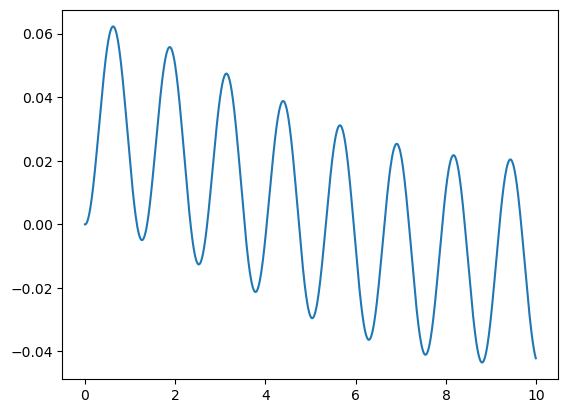

In [18]:
result_np = result.detach().numpy() # Convert to numpy array

# 2D plot of X and Z
plt.plot(result_np[:,2], result_np[:,0])

plt.show()

# Euler's method for training

In [19]:
ode_train_coeffs = {"a": 0., "b": 0., "d": 0., "g": 0., "w": 0.}

ode_solver_train = ODEDuffingSolver(
    init_vars=ode_init,
    init_coeffs=ode_train_coeffs,
    dt=dt,
    solver="euler",
    optimizer=None
)

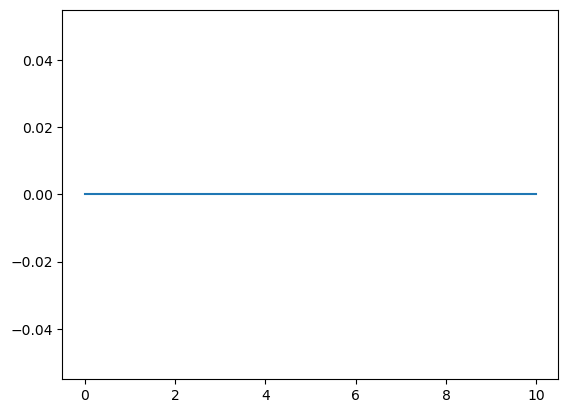

In [20]:
results_test = ode_solver_train(1000)
results_test_np = results_test.detach().numpy() # Convert to numpy array

# 2D plot of X and Z
plt.plot(results_test_np[:,2], results_test_np[:,0])

plt.show()

In [21]:
ode_solver_train.fit(
    result,torch.optim.Adam,
    {"lr": 0.1},
    max_epochs=10
)

Epoch: 0	 Loss: tensor(0.0046, grad_fn=<MseLossBackward>)
{'a': Parameter containing:
tensor(0., requires_grad=True), 'b': Parameter containing:
tensor(0., requires_grad=True), 'd': Parameter containing:
tensor(0., requires_grad=True), 'g': Parameter containing:
tensor(-0.1000, requires_grad=True), 'w': Parameter containing:
tensor(0., requires_grad=True)}
Epoch: 1	 Loss: tensor(1.7642, grad_fn=<MseLossBackward>)
{'a': Parameter containing:
tensor(0.0744, requires_grad=True), 'b': Parameter containing:
tensor(0.0744, requires_grad=True), 'd': Parameter containing:
tensor(0.0744, requires_grad=True), 'g': Parameter containing:
tensor(-0.0258, requires_grad=True), 'w': Parameter containing:
tensor(0., requires_grad=True)}
Epoch: 2	 Loss: tensor(0.0354, grad_fn=<MseLossBackward>)
{'a': Parameter containing:
tensor(0.1329, requires_grad=True), 'b': Parameter containing:
tensor(0.1320, requires_grad=True), 'd': Parameter containing:
tensor(0.1327, requires_grad=True), 'g': Parameter contain

In [22]:
ode_solver_train.coeffs

# The coefficients differ by at most 0.1 from the original with the exception of "w". THe graphs look similar.
# TODO: Investigate why "w" isn't learning

{'a': Parameter containing:
 tensor(0.3755, requires_grad=True),
 'b': Parameter containing:
 tensor(0.3554, requires_grad=True),
 'd': Parameter containing:
 tensor(0.3645, requires_grad=True),
 'g': Parameter containing:
 tensor(0.2422, requires_grad=True),
 'w': Parameter containing:
 tensor(0., requires_grad=True)}

# Predictions for nt = 10000

In [23]:
results_test = ode_solver_train(10000)
results_test

tensor([[ 0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  2.4221e-03,  1.0000e-02],
        [ 2.4221e-05,  4.8354e-03,  2.0000e-02],
        ...,
        [ 5.1547e-01, -2.1869e-06,  9.9973e+01],
        [ 5.1547e-01, -2.1870e-06,  9.9983e+01],
        [ 5.1547e-01, -2.1869e-06,  9.9993e+01]], grad_fn=<StackBackward>)

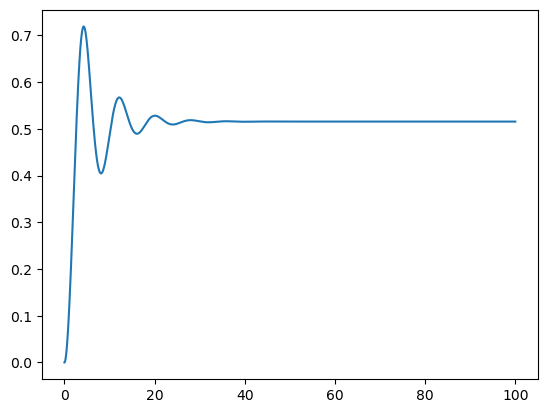

In [24]:
results_test_np = results_test.detach().numpy() # Convert to numpy array

# 2D plot
plt.plot(results_test_np[:,2], results_test_np[:,0])

plt.show()

In [25]:
import scipy.io

scipy.io.savemat("Duffing_fitRandomSample.mat", {"x": results_test_np})